# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [5]:
#load the library
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [1]:
starbucks <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-12-21/starbucks.csv') 

starbucks |> head()

Rows: 1147 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): product_name, size, trans_fat_g, fiber_g
dbl (11): milk, whip, serv_size_m_l, calories, total_fat_g, saturated_fat_g,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


product_name,size,milk,whip,serv_size_m_l,calories,total_fat_g,saturated_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,total_carbs_g,fiber_g,sugar_g,caffeine_mg
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
brewed coffee - dark roast,short,0,0,236,3,0.1,0,0,0,5,0,0,0,130
brewed coffee - dark roast,tall,0,0,354,4,0.1,0,0,0,10,0,0,0,193
brewed coffee - dark roast,grande,0,0,473,5,0.1,0,0,0,10,0,0,0,260
brewed coffee - dark roast,venti,0,0,591,5,0.1,0,0,0,10,0,0,0,340
brewed coffee - decaf pike place roast,short,0,0,236,3,0.1,0,0,0,5,0,0,0,15
brewed coffee - decaf pike place roast,tall,0,0,354,4,0.1,0,0,0,10,0,0,0,20


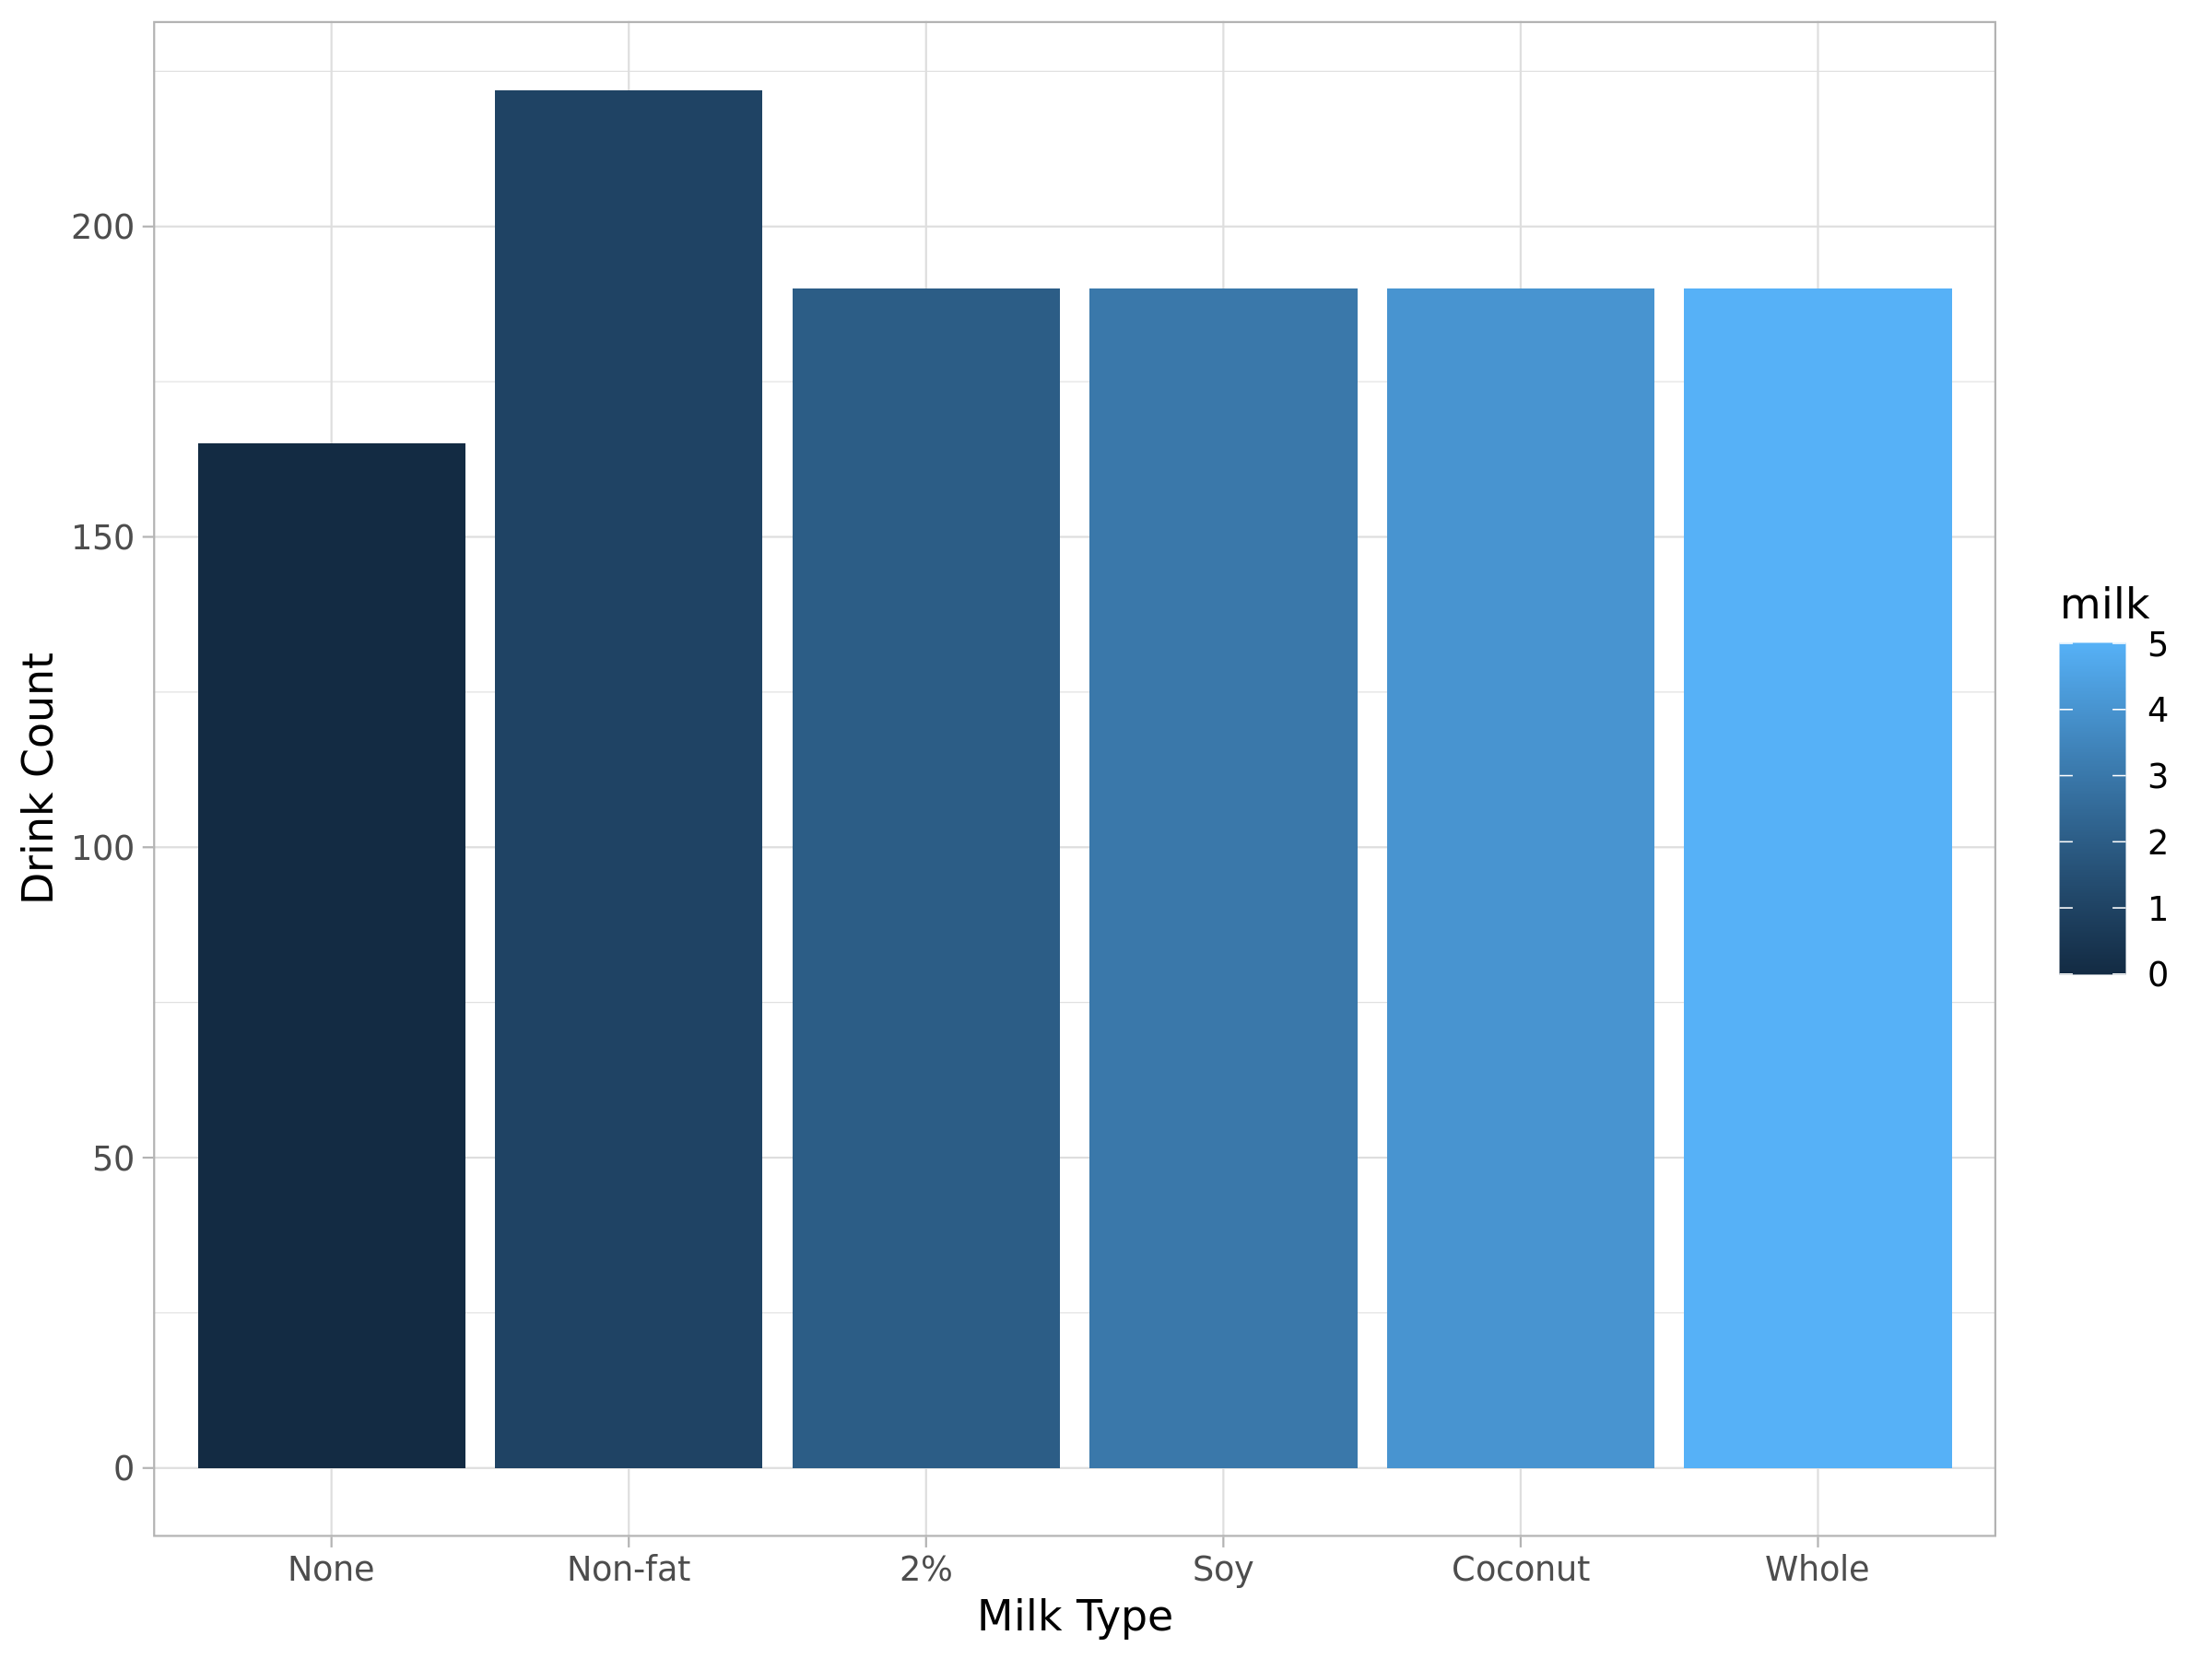

In [6]:
#adjust the view, because I like big plots and I cannot lie
options(repr.plot.res = 300, repr.plot.height = 6, repr.plot.width = 8)


#Milk type graph
milk_type = ggplot(starbucks, aes(x = factor(milk),fill = milk)) +
    geom_bar() +
    theme_light() +
    scale_x_discrete(labels=c('None', 'Non-fat', '2%', 'Soy', 'Coconut', 'Whole')) +
    labs(x = "Milk Type", y = "Drink Count")
                     
milk_type

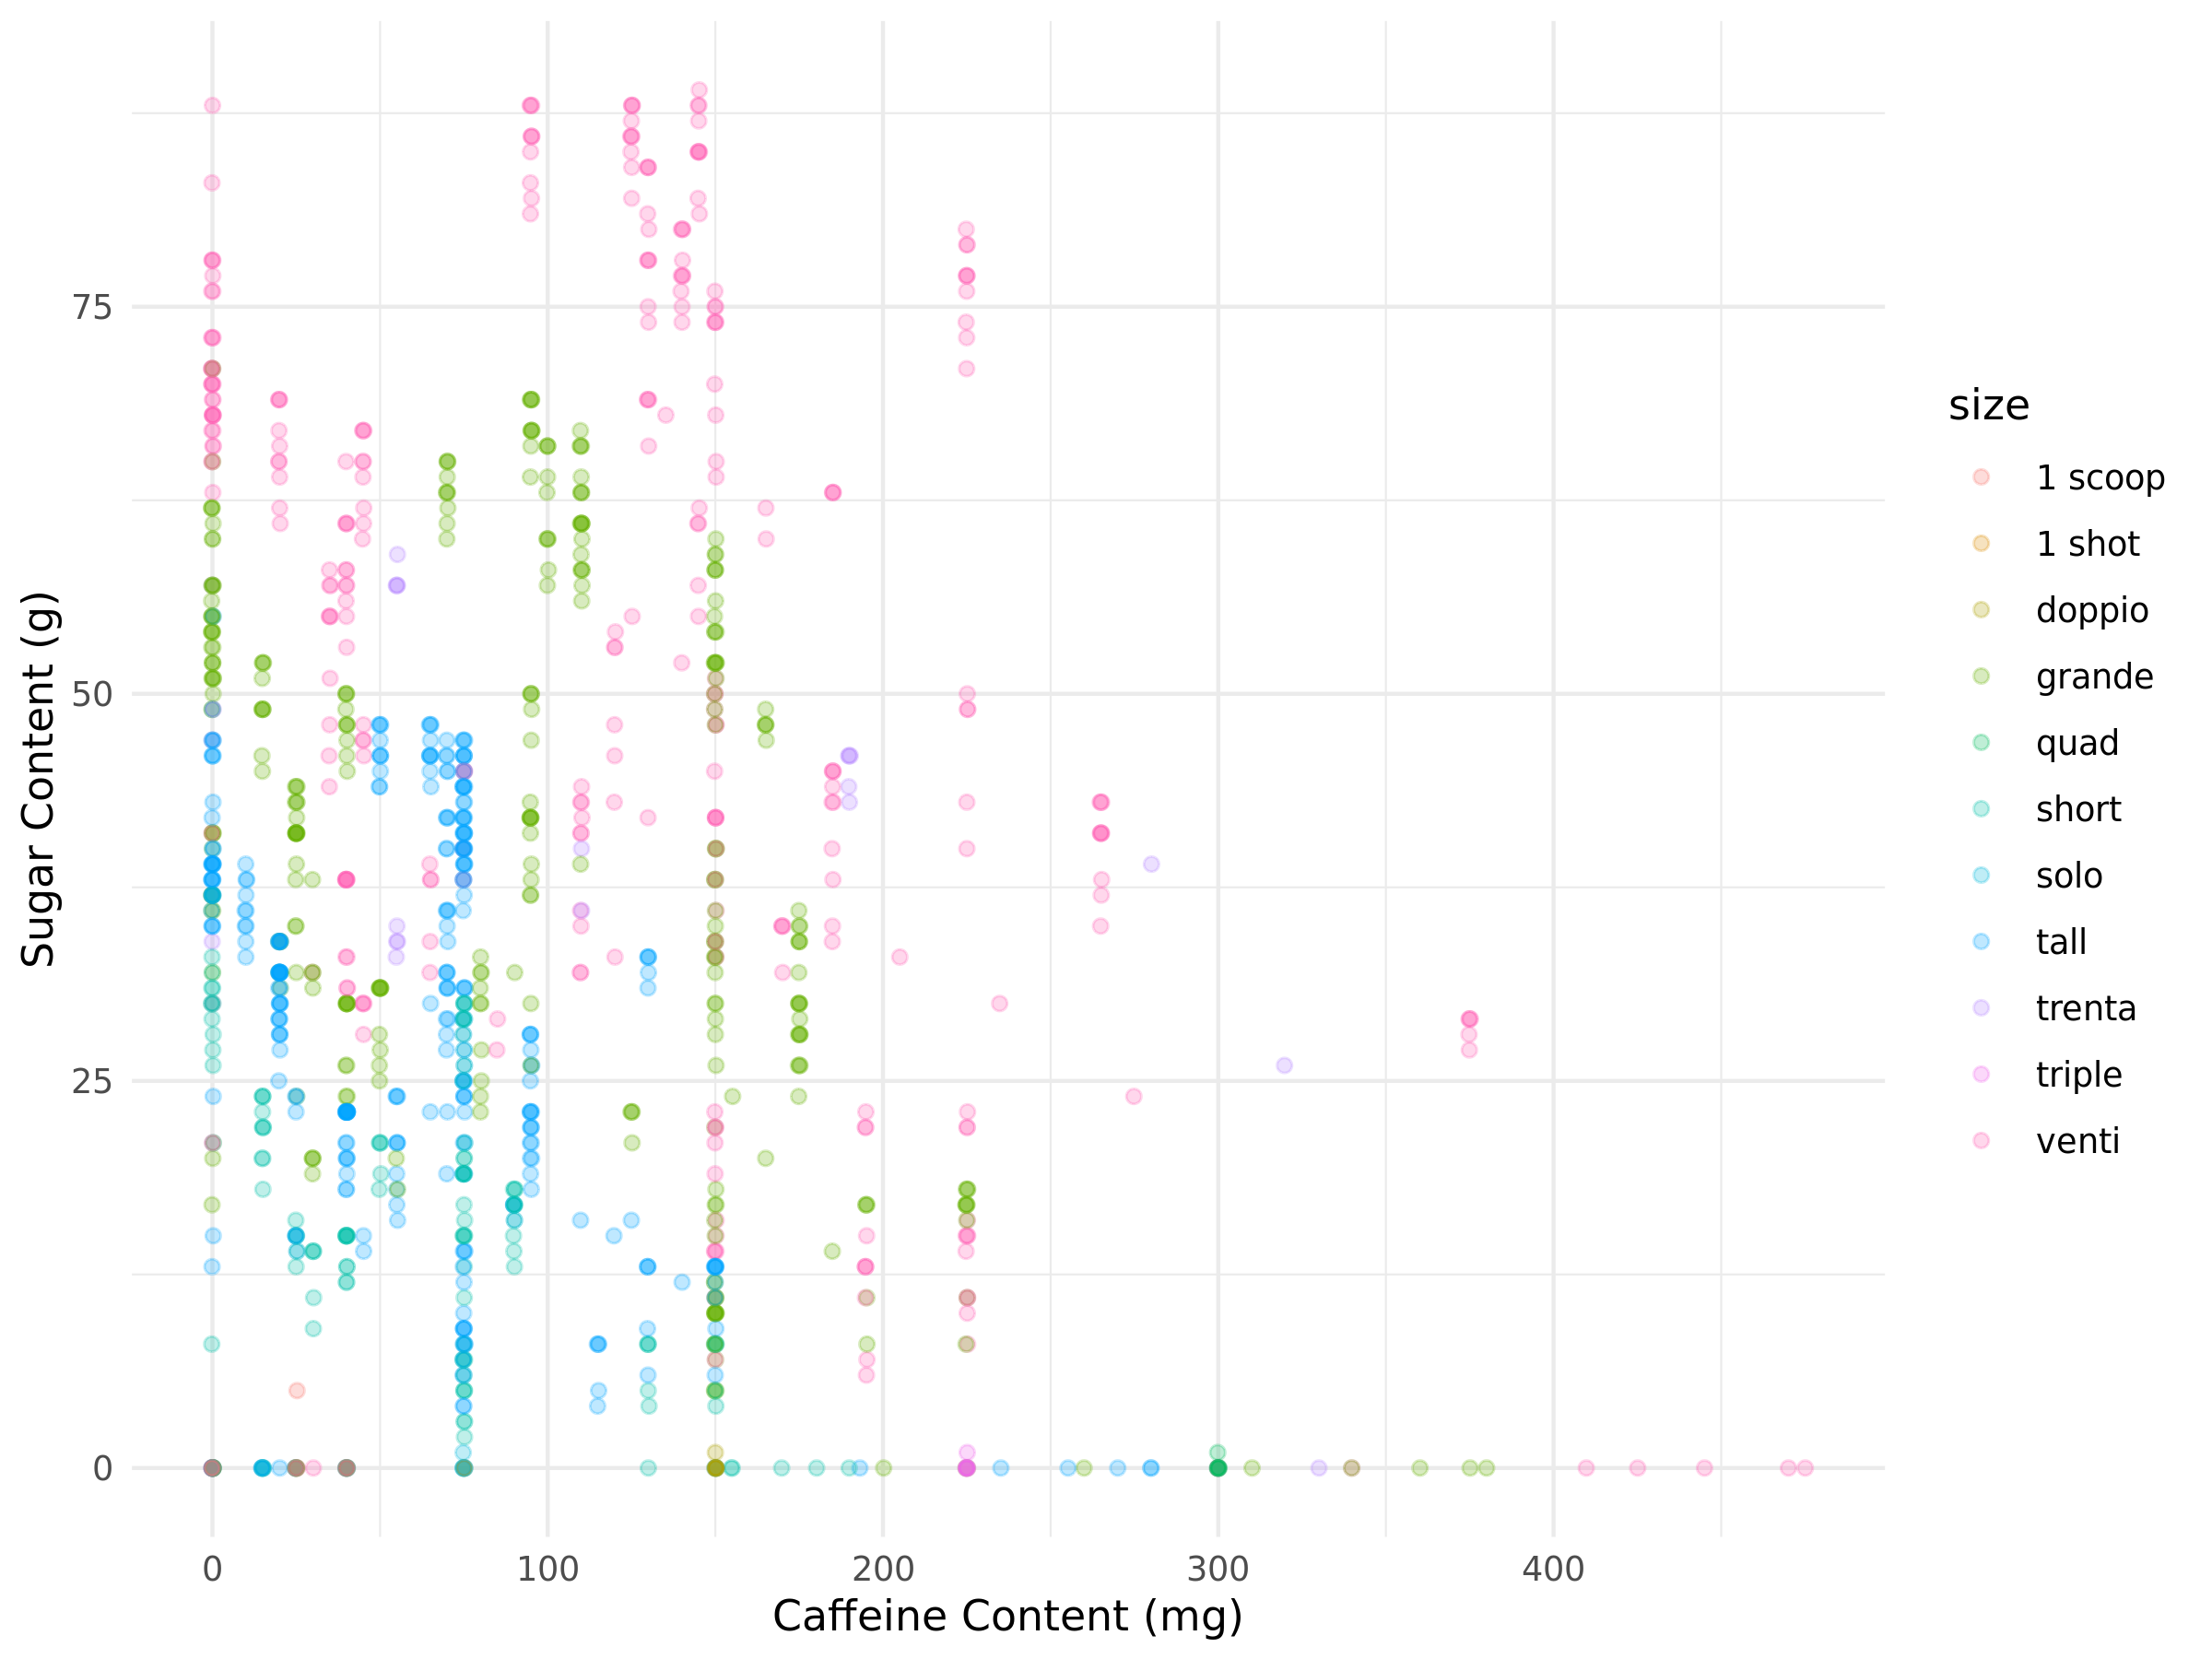

In [7]:
#scatter plot of caffeine and sugar by drink types
caf_sug = ggplot(starbucks, aes(x = caffeine_mg , y = sugar_g, color = size))+
    geom_point(alpha = 0.25, position = position_jitter(width = 0.25, height = 0))+
    labs(x = "Caffeine Content (mg)", y = "Sugar Content (g)")+
    theme_minimal()

caf_sug

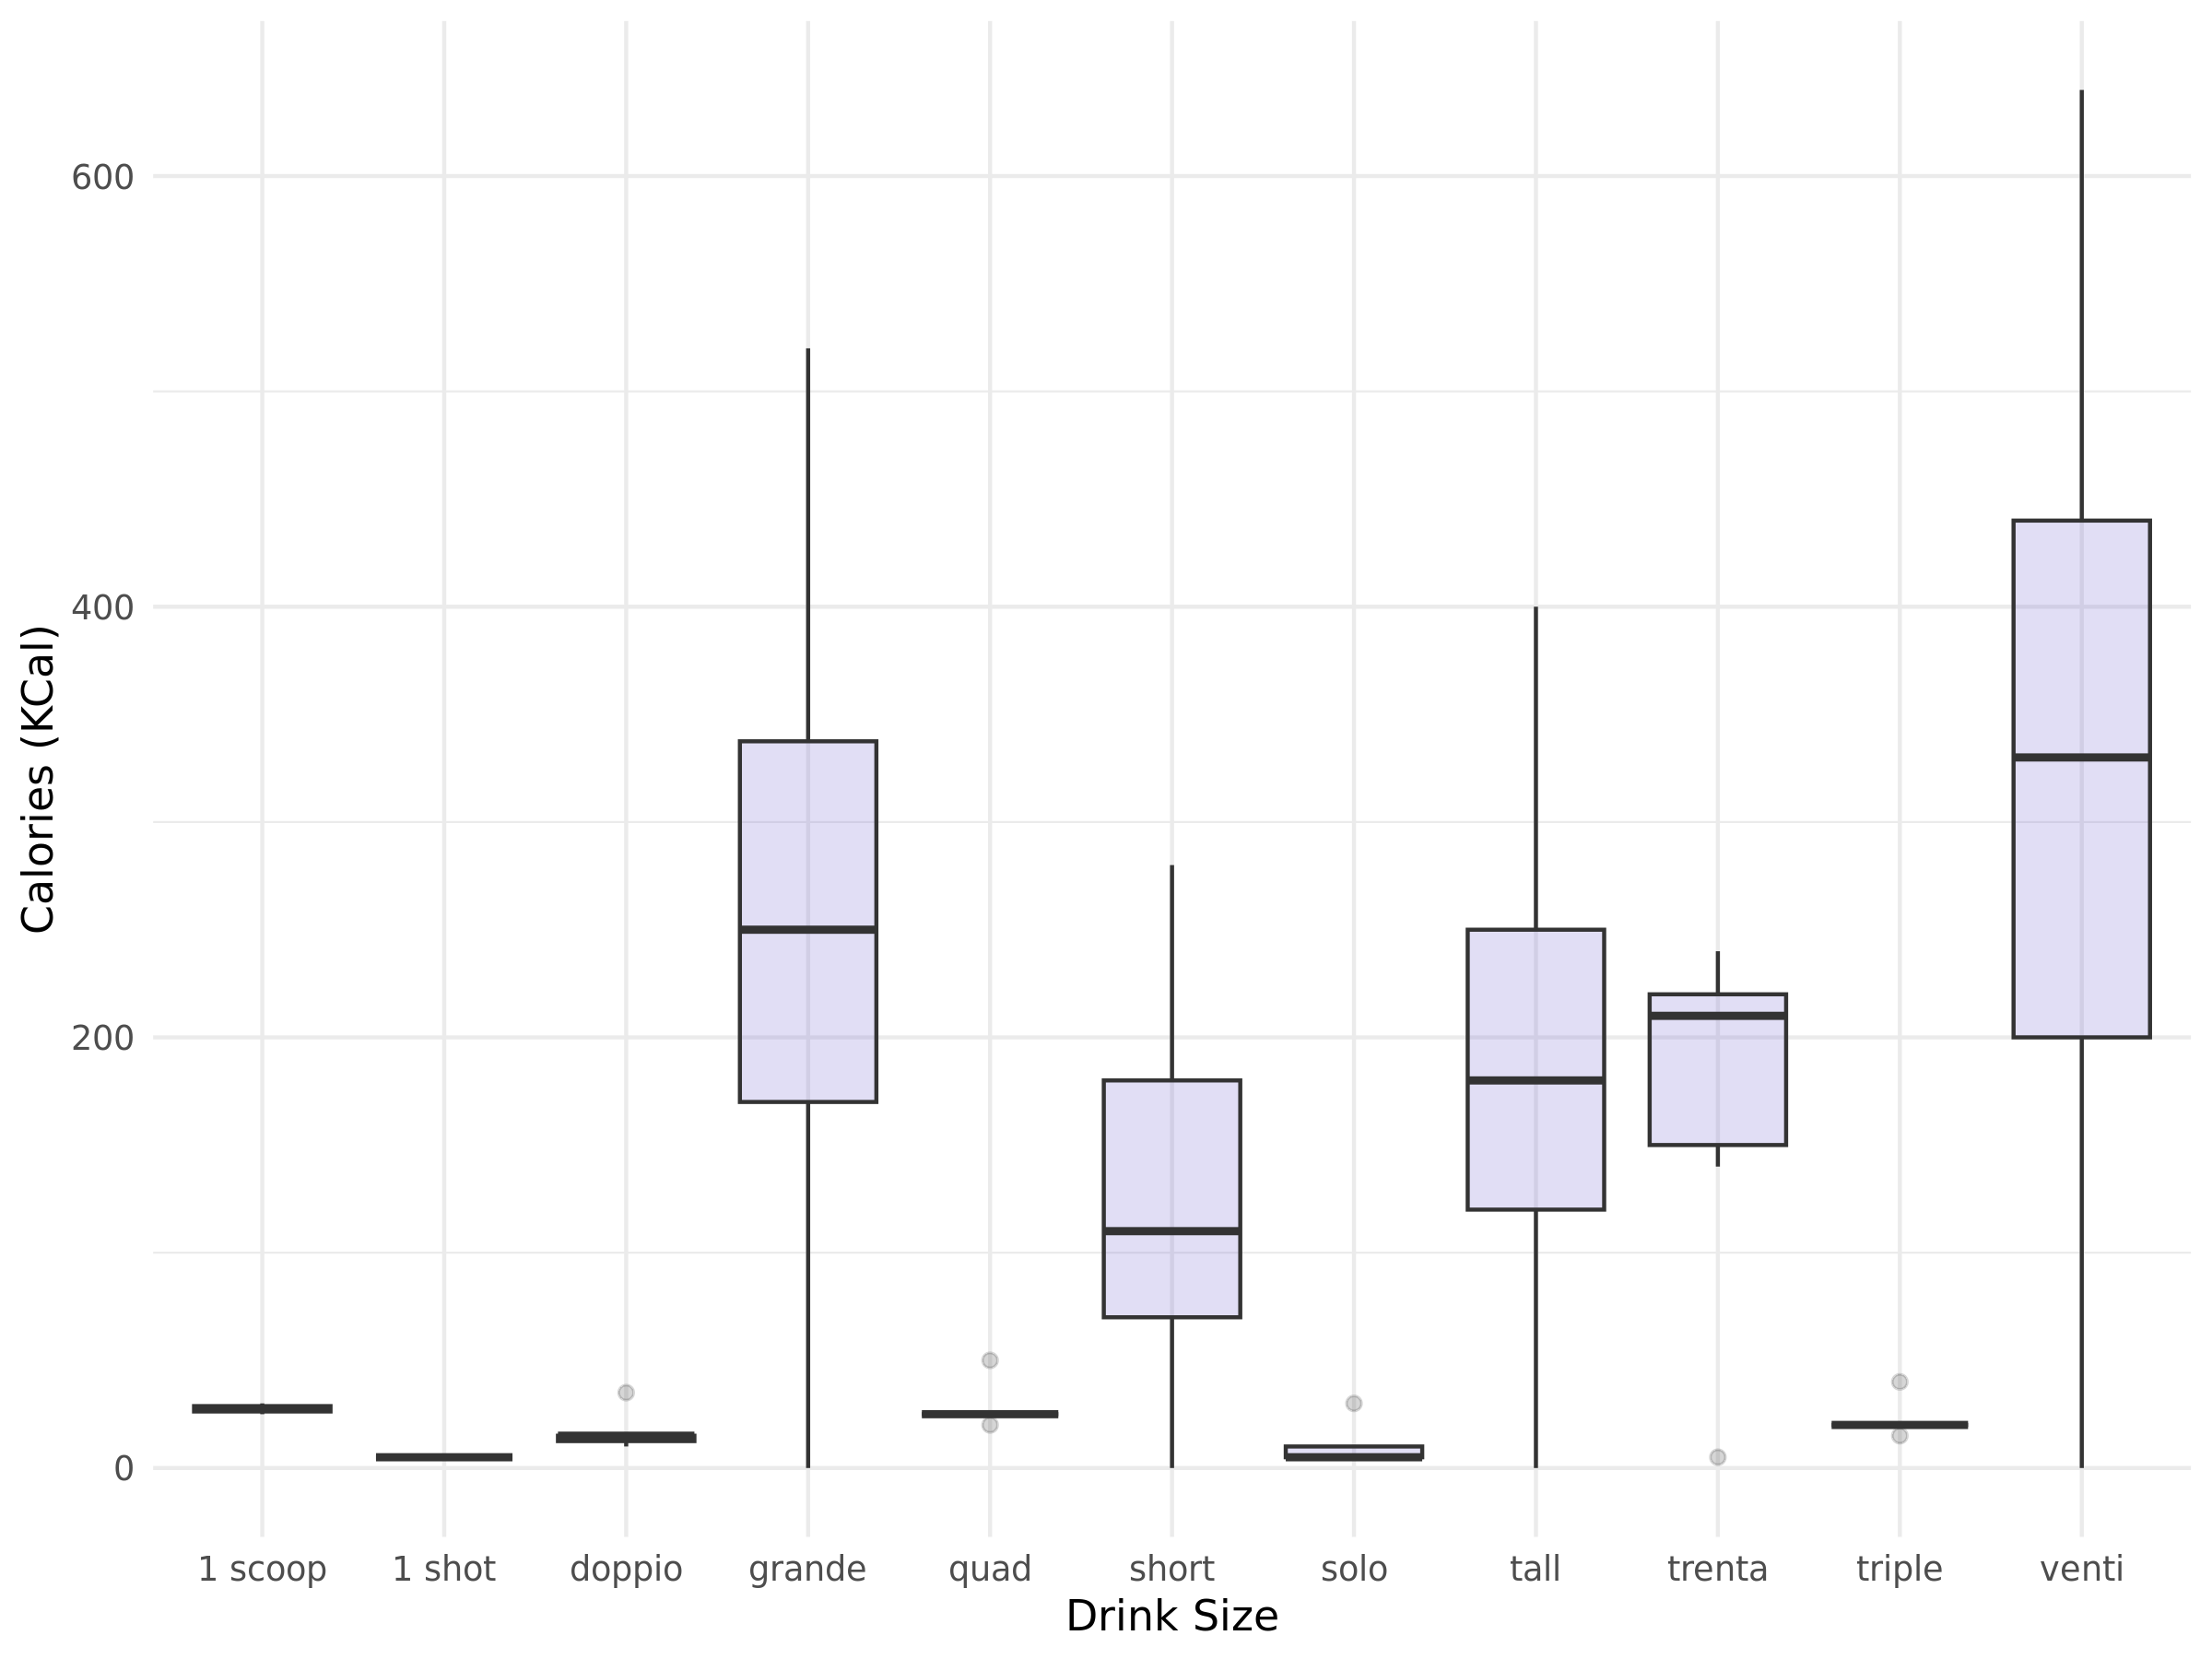

In [9]:
#boxplot of calories by drink size
g = ggplot(starbucks, aes(x = size, y = calories)) +
    geom_boxplot(fill="slateblue", alpha=0.2) +
    labs(x = "Drink Size", y = 'Calories (KCal)') +
    theme_minimal()
g

    To gather my data, I went to tidy tuesday and poked around until I stumbled upon this starubcks data. First, I was curious to see if there a type of milk that was used in more drinks on the menu than others. I made a bar graph representing the number of drinks by what type of milk the have: none, non-fat, 2%, soy, coconut, or whole milk. There were the same number of drinks offered for 2%, soy, coconut, and whole milk. There were fewer drinks offered in the none category and the most offered in the non-fat milk category. 

    For my second graph, I wanted to look at the caffeine and sugar content by the size of drink offered. I was suprised to learn how much caffeine and sugar were in the larger drinks (venti, trenta, and triple). I found it interesting that most drinks appear to be under 200 mg of caffeine but the sugar content is widly varried. Variations in sugar content can be due to syrups, whipped cream or type of milk used.
    
    Finally, my third graph is a boxplot of calories by drink size. The traditional starbucks sizes from smallest to largest are tall (8 oz), grande (12 oz), and venti (24 oz). Most drinks are ordered with this size structure. There is a larger option, the trenta (30 oz), but it is only offered for select beverages (iced coffee, refreshers and iced tea). I was suprised to see that the average calorie count for trenta sized drinks was less than both venti and grande drinks. I had thought that more drink meant more calories but I think the limitation to the types of drinks offered at this size accounts for the difference. I'm sure if high calorie drinks like frappachinos were offered, the trenta box would look a lot different and have a higher average calorie count.
